In [6]:
import numpy as np
import matplotlib.pyplot as plt
import PyAstronomy as PyA
from astropy.io import ascii
from numpy import fft


%matplotlib inline



# Import Radio Data

In [120]:
"""" For additional data information -- please see CRAC.guide.pdf """ 

flux = np.loadtxt('/Users/iraf1/Desktop/CRAC Data/Old Data Set/n3_5.txt') #Solar Drift in Voltage
flux = flux[1:47538] # we trim the data since the sun drifts from FOV of the LNBF
flux_bg = np.loadtxt('/Users/iraf1/Desktop/CRAC Data/Old Data Set/n5_2.txt') # Background Noise
flux_bg = flux_bg[1:47538]
flux_lnbf = np.loadtxt('/Users/iraf1/Desktop/CRAC Data/Old Data Set/n5_3.txt') # LNBF Noise
flux_lnbf = flux_lnbf[1:47538]

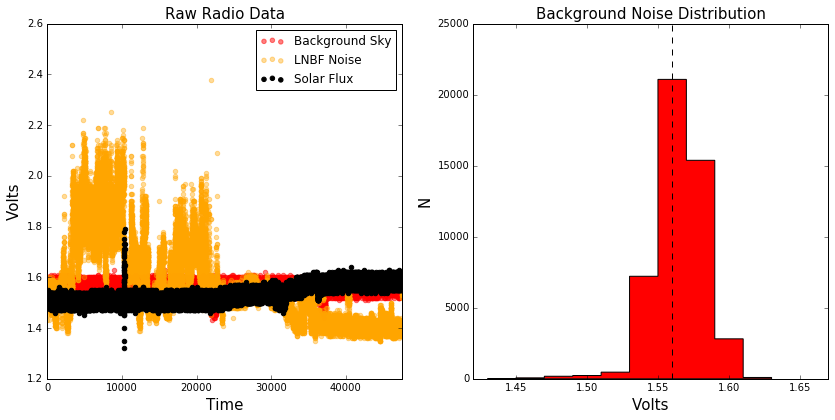

In [240]:
#Define some time of the length of data(trimmed)

t = np.arange(0,len(flux),step=1) #we can use this time for all data since we've trimmed it.

plt.figure(figsize=(14,14))

plt.subplot(221)
plt.scatter(t,flux_bg,color='red',alpha=0.5,label='Background Sky',marker='o')
plt.scatter(t,flux_lnbf,color='orange',alpha=0.4,label='LNBF Noise',marker='o')
plt.scatter(t,flux,color='k',alpha=1,label='Solar Flux')
plt.legend(loc=1)
plt.xlim(0,max(t))
plt.title('Raw Radio Data',size=15)
plt.xlabel('Time',size=15)
plt.ylabel('Volts',size=15)



plt.subplot(222)
plt.hist(flux_bg,color='red',histtype='stepfilled',bins=10)
plt.xlim(1.42,1.67)
plt.axvline(np.mean(flux_bg),color='k',ls='dashed')
plt.xlabel('Volts',size=15)
plt.ylabel('N',size=15)
plt.title('Background Noise Distribution',size=15)


#Histogram of the background noise seems to follow a gaussian distribution with mean ~1.56 Volts

In [274]:
""" We assume that our data naturally contains some % of outliers -- we apply a moving median 
    function to reject any values that exceed a threshhold"""

def remove_outliers(flux,t,window,c):
    #Define empty lists:
    D1, D2, D3, D4 = [], [], [], []
    
    #Moving median function to approximate the trend of the data
    for i in range( len(flux)):
        MM = flux[i:(i+window)] #Jumping indicies -- that allow the moving median
        MED = np.median(np.sort(MM)) #Find moving Median of window 
        
        #Decide if data to be accepted or rejected.   
        if np.absolute(flux[i] - MED) > (c*np.std(flux_bg)): 
            D1.append(flux[i]) #rejected...
            D2.append(t[i])
        else: 
            D3.append(flux[i]) #accepted...
            D4.append(t[i])

    return D1,D2,D3,D4

# Remove Outliers from Data Set

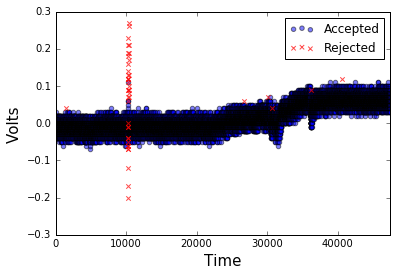

In [299]:
n_f = flux - np.median(flux) # we can simply do this by normalize the flux 

#apply function to normalized data! 
new_data = remove_outliers(n_f,t,50,3.0)

#Rejected values
rej_f = new_data[0]
rej_t = new_data[1]

#accepted values
acc_f = new_data[2]
acc_t = new_data[3]

plt.scatter(acc_t,acc_f,alpha=0.5,label='Accepted')
plt.scatter(rej_t,rej_f,color='red',alpha=0.7,label='Rejected',marker='x')
plt.legend(loc=1)
plt.xlim(0,len(acc_t))
plt.xlabel('Time',size=15)
plt.ylabel('Volts',size=15)



# Meassure $DV$ -- Change in Volts

The mean peak of the transit is: 0.0418076734984 +/- 0.0271617904299 


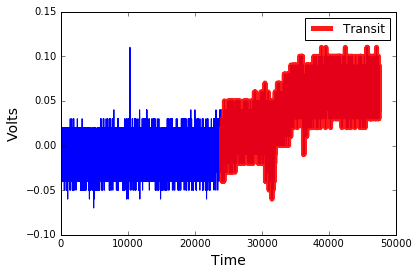

In [318]:
plt.figure()
plt.plot(acc_t,acc_f,color='blue')
plt.plot(acc_t[24000::],acc_f[24000::],color='red',alpha=0.9,label='Transit',lw=5)
plt.legend()
plt.xlabel('Time',size=14)
plt.ylabel('Volts',size=14)

print "The mean peak of the transit is: %s +/- %s "%(np.mean(acc_f[25000::]),np.std(acc_f[25000::]))
# we have approximately ~4% of voltage increase when then sun luminates the radio telescope
